In [1]:
#numpy and pandas used for data manipulation
import numpy as np
import pandas as pd
#matplotlib used for visualization
from matplotlib import pyplot as plt
#os used to get file directories
import os
#opencv used to make get images into numbered arrays
import cv2
import random
from time import time

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


First, grab all the file directories for images which are:
* size 1
* showing a straight or up profile
* not wearing sunglasses

In [2]:
def get_filedir(list):
    allnames = []
    count = 0
    tempname = 'an2i'
    for (dirpath, dirnames, filenames) in os.walk("faces/"):
        allnames.extend(filenames)
    for name in allnames[1:]:
        if (name.split("_")[1] in ["straight", 'up']) and (name.split('_')[-1] not in ['2.pgm', '4.pgm', 'sunglasses.pgm']) and (name[-3:] =='pgm'):
            if name.split('_')[0] != tempname:
                count = count + 1
                tempname = name.split('_')[0]
                filedir.append([])
            filedir[count].append('faces/' + name.split('_')[0] + '/' + name)

In [3]:
filedir = [[]]
get_filedir(filedir)

the first 2 people in the file:

In [4]:
filedir[:2]

[['faces/an2i/an2i_straight_angry_open.pgm',
  'faces/an2i/an2i_straight_happy_open.pgm',
  'faces/an2i/an2i_straight_neutral_open.pgm',
  'faces/an2i/an2i_straight_sad_open.pgm',
  'faces/an2i/an2i_up_angry_open.pgm',
  'faces/an2i/an2i_up_happy_open.pgm',
  'faces/an2i/an2i_up_neutral_open.pgm',
  'faces/an2i/an2i_up_sad_open.pgm'],
 ['faces/at33/at33_straight_angry_open.pgm',
  'faces/at33/at33_straight_happy_open.pgm',
  'faces/at33/at33_straight_neutral_open.pgm',
  'faces/at33/at33_straight_sad_open.pgm',
  'faces/at33/at33_up_angry_open.pgm',
  'faces/at33/at33_up_happy_open.pgm',
  'faces/at33/at33_up_neutral_open.pgm',
  'faces/at33/at33_up_sad_open.pgm']]

an example of an image:

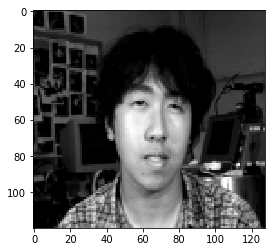

In [5]:
img1 = cv2.imread(filedir[0][0],0)
plt.imshow(img1, plt.cm.gray)
plt.show()

split the set into a training set and a testing set, with pics organized per person, and 3 per person in the train set

In [6]:
def train_test_split(filedir, train, test):
    for var in filedir:
        random.shuffle(var)
        train.append(var[:3])
        test.append(var[3:])

In [7]:
train = []
test = []

train_test_split(filedir, train, test)

In [8]:
train[:3]

[['faces/an2i/an2i_straight_neutral_open.pgm',
  'faces/an2i/an2i_up_neutral_open.pgm',
  'faces/an2i/an2i_up_sad_open.pgm'],
 ['faces/at33/at33_up_angry_open.pgm',
  'faces/at33/at33_up_neutral_open.pgm',
  'faces/at33/at33_straight_angry_open.pgm'],
 ['faces/boland/boland_up_sad_open.pgm',
  'faces/boland/boland_up_angry_open.pgm',
  'faces/boland/boland_up_happy_open.pgm']]

In [9]:
test[:3]

[['faces/an2i/an2i_up_angry_open.pgm',
  'faces/an2i/an2i_up_happy_open.pgm',
  'faces/an2i/an2i_straight_happy_open.pgm',
  'faces/an2i/an2i_straight_angry_open.pgm',
  'faces/an2i/an2i_straight_sad_open.pgm'],
 ['faces/at33/at33_up_happy_open.pgm',
  'faces/at33/at33_straight_happy_open.pgm',
  'faces/at33/at33_up_sad_open.pgm',
  'faces/at33/at33_straight_sad_open.pgm',
  'faces/at33/at33_straight_neutral_open.pgm'],
 ['faces/boland/boland_straight_neutral_open.pgm',
  'faces/boland/boland_straight_sad_open.pgm',
  'faces/boland/boland_straight_happy_open.pgm',
  'faces/boland/boland_straight_angry_open.pgm',
  'faces/boland/boland_up_neutral_open.pgm']]

In [10]:
def get_img_matrix(img_list, filedir):
    for person in filedir:
        for img in person:
            img_list.append(cv2.imread(img, 0).ravel())

In [11]:
def get_person_name(name_list, filedir):
    for person in filedir:
        for img in person:
            name_list.append(img.split('/')[1])

In [12]:
y_test = []
x_test = []

y_train = []
x_train = []

get_person_name(y_test, test)
get_img_matrix(x_test, test)

get_person_name(y_train, train)
get_img_matrix(x_train, train)

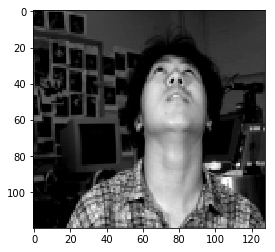

In [13]:
image1 = np.array(x_test[0]).reshape(img1.shape)
plt.imshow(image1, plt.cm.gray)
plt.show()

In [14]:
pca1 = PCA(n_components=50)
pca1.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca1.components_
#list of principle components

array([[ -3.01714782e-03,  -2.68217281e-03,  -2.11711018e-03, ...,
          3.84030956e-04,   3.95453931e-04,   6.76088532e-04],
       [  4.05563353e-03,   3.93274799e-03,   2.23377304e-03, ...,
          6.66305154e-03,   6.50415984e-03,   5.99048354e-03],
       [  7.48756784e-03,   7.87599023e-03,   5.86173844e-03, ...,
          5.52551094e-03,   5.38766197e-03,   5.09534892e-03],
       ..., 
       [ -1.31063673e-03,  -1.97446549e-03,  -2.28332294e-03, ...,
          3.53180598e-03,   3.69754308e-03,   3.20238916e-03],
       [  1.81436428e-03,   5.08858800e-04,   6.16189001e-04, ...,
          1.29700633e-03,   5.53667761e-04,  -6.77307759e-04],
       [ -3.09465905e-04,  -2.45660858e-04,  -2.76315492e-04, ...,
         -8.07659989e-04,  -3.42498736e-05,  -2.16259012e-04]])

In [16]:
#alternatively, use numpy svd method
U, s, V = np.linalg.svd(x_train, full_matrices=False)

In [17]:
img1.shape

(120, 128)

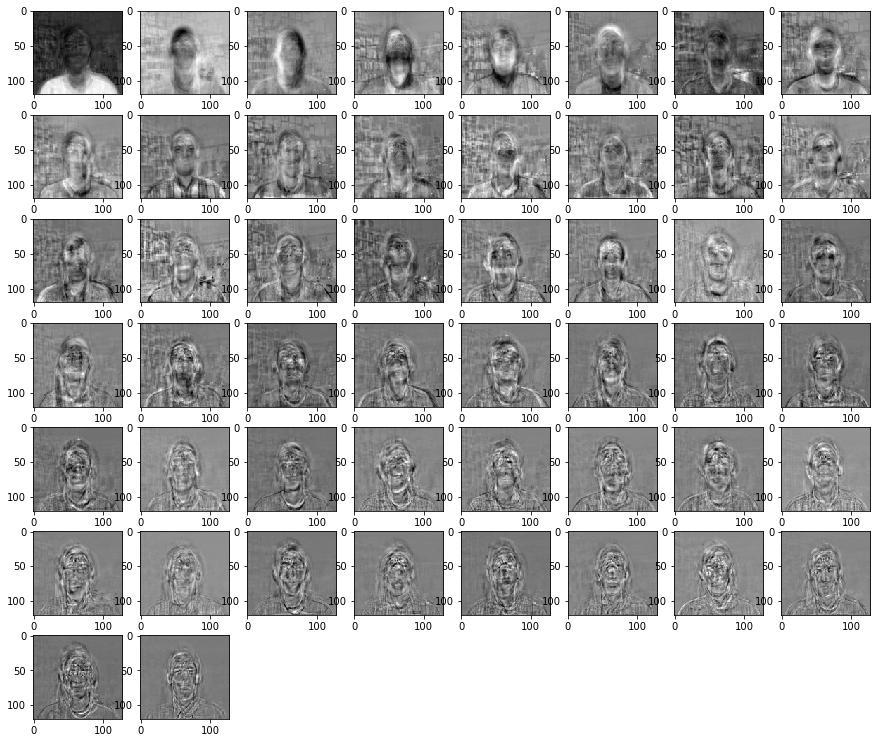

In [18]:
eigenfaces = pca1.components_.reshape((50, 120, 128))
i = 1
plt.figure(figsize=(15, 15))
for row in eigenfaces:
    plt.subplot(8,8,i)
    plt.imshow(row, plt.cm.gray)
    i = i + 1
plt.show()

In [19]:
x_train_pca = pca1.transform(x_train)
x_test_pca = pca1.transform(x_test)

In [20]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(x_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 0.653s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [21]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(x_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))#, labels=range(n_classes)))

Predicting people's names on the test set
done in 0.002s
             precision    recall  f1-score   support

       an2i       1.00      0.40      0.57         5
       at33       1.00      0.40      0.57         5
     boland       0.00      0.00      0.00         5
        bpm       0.00      0.00      0.00         5
       ch4f       1.00      0.60      0.75         5
     cheyer       1.00      0.80      0.89         5
      choon       1.00      1.00      1.00         5
    danieln       1.00      0.20      0.33         5
   glickman       1.00      0.50      0.67         4
    karyadi       1.00      1.00      1.00         5
   kawamura       1.00      0.75      0.86         4
       kk49       1.00      0.80      0.89         5
      megak       1.00      1.00      1.00         5
   mitchell       1.00      1.00      1.00         4
      night       1.00      0.80      0.89         5
     phoebe       1.00      0.60      0.75         5
     saavik       1.00      1.00      1.0

C:\Users\emily\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


some code copied from: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html#sphx-glr-auto-examples-applications-face-recognition-py